# **Water Potability**

## Data Preprocessing

In [ ]:
#Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs


from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score, silhouette_samples

from google.colab import files

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658


Penjelasan Atribut:
1. pH value: Menunjukkan tingkat keasaman atau kebasaan air. Rentang normal pH air minum menurut WHO adalah 6,5 hingga 8,5.
2. Hardness: Menunjukkan jumlah kalsium dan magnesium dalam air. Kekerasan air diukur oleh kapasitasnya dalam mengendapkan sabun.
3. Solids (Total dissolved solids - TDS): Menunjukkan jumlah mineral yang larut dalam air. TDS tinggi menunjukkan air yang sangat mineralized.
4. Chloramines: Mengindikasikan kandungan klorin dan kloramin sebagai disinfektan dalam air minum.
5. Sulfate: Menunjukkan kandungan sulfat dalam air, yang biasanya berasal dari mineral, tanah, dan batuan.
6. Conductivity: Mengukur kemampuan air dalam menghantarkan arus listrik. Nilai yang tinggi menandakan adanya lebih banyak zat terlarut dalam air.
7. Organic_carbon: Total Karbon Organik dalam air, berasal dari bahan organik alami yang membusuk atau sumber-sumber sintetis.
8. Trihalomethanes: Menunjukkan kandungan bahan kimia yang terbentuk saat air diolah dengan klorin.
9. Turbidity: Menunjukkan seberapa jernih air dengan mengukur jumlah partikel padat yang terlarut di dalamnya.

In [ ]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
dtype: int64

In [ ]:
df.drop('Sulfate', axis=1, inplace=True)
df

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,NaN,204.890455,20791.318981,7.300212,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,392.449580,19.903225,NaN,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,402.883113,11.168946,77.488213,4.708658


In [ ]:
df = df.dropna(subset=['ph'])
df = df.dropna(subset=['Trihalomethanes'])
df

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1,3.716080,129.422921,18630.057858,6.635246,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,280.467916,8.399735,54.917862,2.559708
...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,415.886955,12.067620,60.419921,3.669712
3271,4.668102,193.681735,47580.991603,7.166639,526.424171,13.894419,66.687695,4.435821
3273,9.419510,175.762646,33155.578218,7.350233,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,402.883113,11.168946,77.488213,4.708658


In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

## Detect and Remove Outliers

In [ ]:
mean = df.mean()
std_dev = df.std()
std_dev

ph                    1.584537
Hardness             32.892158
Solids             8692.441264
Chloramines           1.586310
Conductivity         81.103742
Organic_carbon        3.314805
Trihalomethanes      16.162351
Turbidity             0.780571
dtype: float64

In [ ]:
z_scores = zscore(df.select_dtypes(include='number'))

In [ ]:
threshold = 3
outlier_rows = (abs(z_scores) > threshold).any(axis=1)

# Hapus baris yang memiliki pencilan
cleaned_df = df[~outlier_rows]

Threshold (ambang batas) digunakan dalam metode Z-score untuk menentukan kapan sebuah data dianggap sebagai pencilan. Nilai threshold digunakan untuk membatasi sejauh mana data bisa berbeda dari rata-rata (mean) sebelum dianggap sebagai pencilan

In [ ]:
cleaned_df

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1,3.716080,129.422921,18630.057858,6.635246,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,280.467916,8.399735,54.917862,2.559708
...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,415.886955,12.067620,60.419921,3.669712
3271,4.668102,193.681735,47580.991603,7.166639,526.424171,13.894419,66.687695,4.435821
3273,9.419510,175.762646,33155.578218,7.350233,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,402.883113,11.168946,77.488213,4.708658


## Normalisasi Data

### Sebelum Normalisasi

In [ ]:
cleaned_df.describe()


,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000
mean,7.083217,196.100155,21641.182118,7.117006,427.055849,14.332855,66.568570,3.967643
std,1.505953,31.614787,8321.887482,1.525443,80.329975,3.294121,15.867936,0.771648
min,2.376768,98.452931,320.942611,2.386653,201.619737,4.371899,18.015272,1.641515
25%,6.102533,176.896033,15513.740378,6.146098,367.854025,12.164736,56.044934,3.444442
50%,7.038348,197.049965,20571.845708,7.121264,423.662707,14.282961,66.588849,3.955917
75%,8.028304,216.441172,27022.708505,8.095427,483.319881,16.589072,77.447639,4.506540
max,11.621140,287.975540,47852.888871,11.753904,669.725086,23.917601,114.208671,6.307678


In [ ]:
columns_to_normalize = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

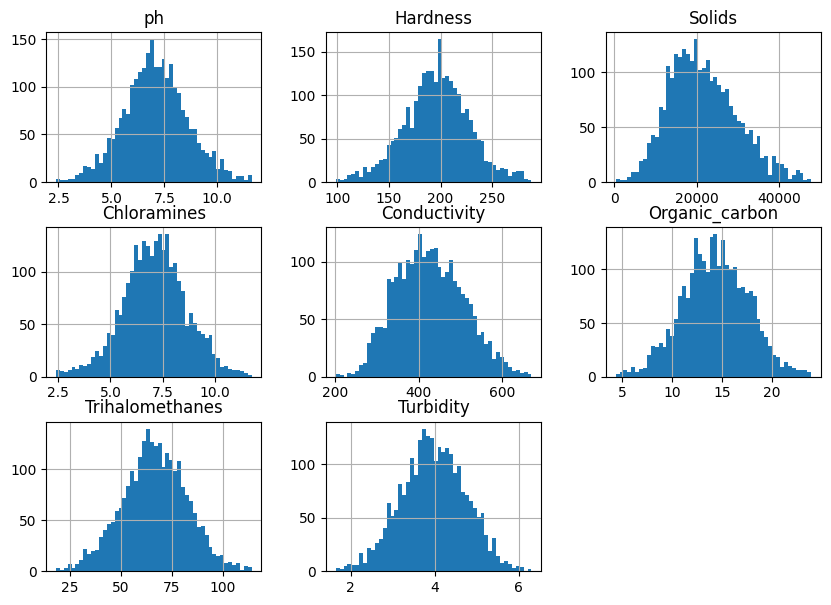

In [ ]:
cleaned_df.hist(column=columns_to_normalize, bins=50, figsize=(10, 7))
plt.show()

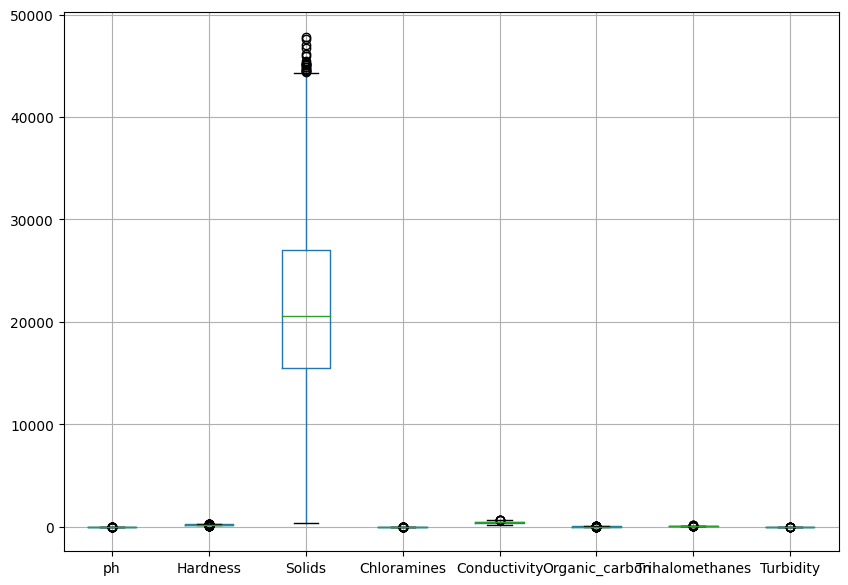

In [ ]:
cleaned_df.boxplot(column=columns_to_normalize, figsize=(10, 7))
plt.show()

Statistik Deskriptif: Nilai rata-rata (mean) dan standar deviasi (std) untuk setiap atribut tidak konsisten dengan apa yang diharapkan dari dataset yang telah dinormalisasi. Normalisasi Z-score biasanya menghasilkan mean mendekati 0 dan std mendekati 1 untuk semua variabel. Dari gambar yang Anda berikan, terlihat bahwa tidak semua variabel memiliki mean dekat dengan 0 atau std dekat dengan 1.

Histogram: Histogram untuk beberapa variabel menunjukkan distribusi yang simetris dan berbentuk lonceng, tetapi ini tidak cukup untuk menentukan normalisasi karena skala sumbu-x tidak terpusat di sekitar 0, yang merupakan indikasi dari data yang telah dinormalisasi dengan Z-score.

Boxplot: Boxplot menunjukkan adanya outlier dan median tidak terletak di nilai nol, yang menunjukkan bahwa data belum dinormalisasi dengan Z-score.

### Normalisasi dengan Scaler

In [ ]:
scaler = StandardScaler()
scaled_df = cleaned_df.copy()
scaled_df[columns_to_normalize] = scaler.fit_transform(cleaned_df[columns_to_normalize])
scaled_df.describe()

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2.557000e+03,2.557000e+03,2.557000e+03,2.557000e+03,2.557000e+03,2.557000e+03,2.557000e+03,2.557000e+03
mean,-3.515200e-16,-5.974450e-16,8.197501e-17,1.333831e-16,-3.779187e-16,1.180996e-16,-1.444983e-16,-4.112645e-16
std,1.000196e+00,1.000196e+00,1.000196e+00,1.000196e+00,1.000196e+00,1.000196e+00,1.000196e+00,1.000196e+00
min,-3.125841e+00,-3.089261e+00,-2.562449e+00,-3.101577e+00,-2.806925e+00,-3.024450e+00,-3.060436e+00,-3.015082e+00
25%,-6.513322e-01,-6.075600e-01,-7.364483e-01,-6.366005e-01,-7.371271e-01,-6.583071e-01,-6.633310e-01,-6.781621e-01
50%,-2.980063e-02,3.004910e-02,-1.285220e-01,2.791584e-03,-4.224830e-02,-1.514946e-02,1.278220e-03,-1.519894e-02
75%,6.276903e-01,6.435278e-01,6.467979e-01,6.415265e-01,7.005484e-01,6.850563e-01,6.857349e-01,6.985079e-01
max,3.013913e+00,2.906657e+00,3.150347e+00,3.040301e+00,3.021496e+00,2.910221e+00,3.002874e+00,3.033110e+00


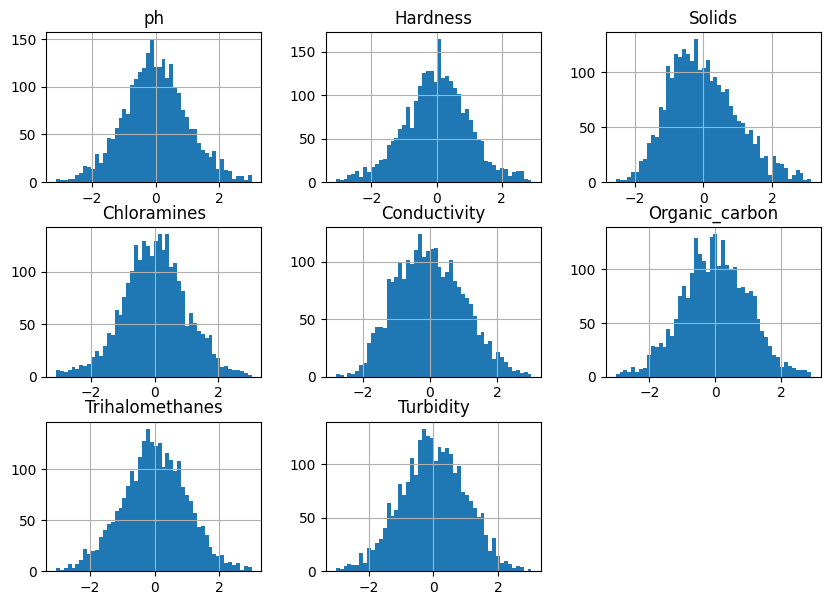

In [ ]:
scaled_df.hist(column=columns_to_normalize, bins=50, figsize=(10, 7))
plt.show()

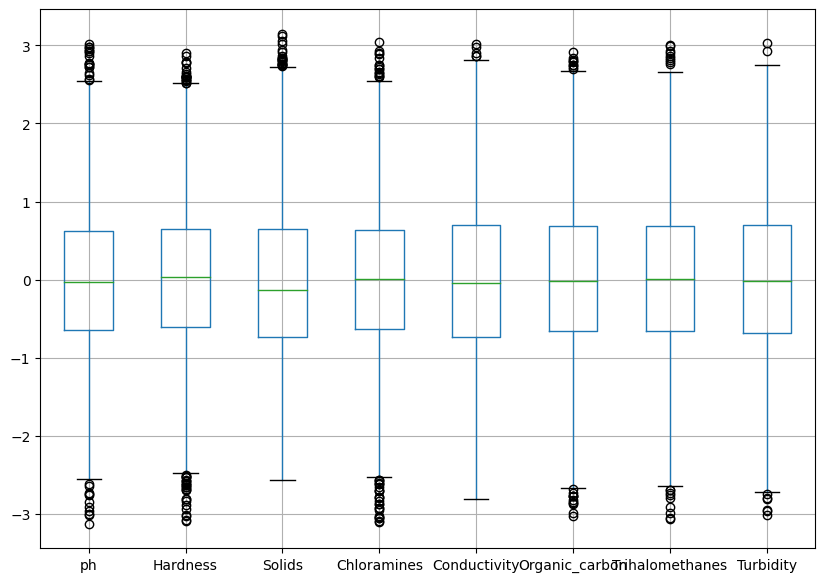

In [ ]:
scaled_df.boxplot(column=columns_to_normalize, figsize=(10, 7))
plt.show()

Statistik Deskriptif:
Rata-rata (mean) sangat dekat dengan 0, dan standar deviasi (std) sangat dekat dengan 1 untuk setiap variabel. Ini adalah karakteristik khas dari data yang telah dinormalisasi menggunakan StandardScaler atau metode normalisasi Z-score.

Histogram:
Distribusi data terlihat simetris dan terpusat di sekitar 0, yang konsisten dengan hasil normalisasi Z-score.

Boxplot:
Median terletak di sekitar 0, dan whiskers (garis yang membentang dari box) kira-kira sama panjang di kedua sisi box. Ini menunjukkan bahwa data telah disesuaikan agar rata-rata menjadi 0 dan varians menjadi 1.

## Clustering with DBSCAN

In [ ]:
centers = [[1, 1], [-1, -1], [1, -1]]
X = scaled_df.copy()
X = StandardScaler().fit_transform(X)

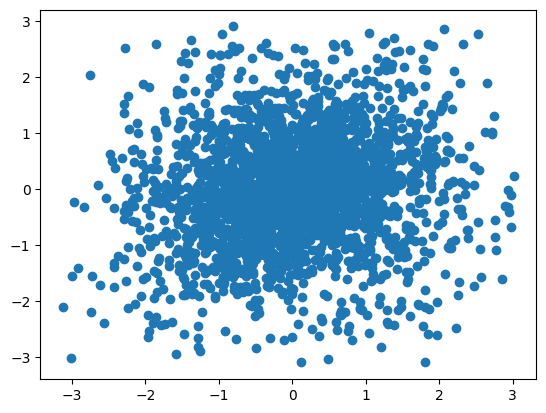

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [ ]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 0
Estimated number of noise points: 2557


In [ ]:
print('Jumlah kluster ditemukan: %d' % n_clusters_)
print('Jumlah noise ditemukan: %d' % n_noise_)

Jumlah kluster ditemukan: 0
Jumlah noise ditemukan: 2557


In [ ]:
if n_clusters_ > 1:
    silhouette_avg = silhouette_score(scaled_df, clusters)
    print("Nilai rata-rata silhouette_score adalah:", silhouette_avg)
else:
    print("Silhouette score tidak bisa dihitung jika jumlah kluster <= 1")

Silhouette score tidak bisa dihitung jika jumlah kluster <= 1


In [ ]:
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

In [ ]:
unique_labels = set(clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Hitam digunakan untuk noise.
        col = [0, 0, 0, 1]

    class_member_mask = (clusters == k)

    xy = scaled_df[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = scaled_df[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Jumlah kluster: %d' % n_clusters_)
plt.show()

InvalidIndexError: ignored

In [ ]:
# Statistik Deskriptif per Klaster
df_agglomerative_labels = scaled_df.copy()
df_agglomerative_labels['cluster'] = labels
df_agglomerative_labels.groupby('cluster').mean()

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
cluster,,,,,,,,
0,0.001259,-0.009862,0.003204,-0.031610,-0.003915,-0.009071,0.129754,-0.002770
1,0.281043,0.238737,0.516443,-2.583782,-0.033589,0.176478,-0.218627,-0.288622
2,0.019022,-0.054790,-0.117749,0.943087,0.049167,0.030141,2.095579,0.064226
3,-0.057480,0.060802,-0.014625,0.327163,0.027116,0.043414,-1.658035,0.086468
4,-0.171583,0.006274,-0.841291,2.245436,0.030517,-0.012458,-1.434237,-0.179866


In [ ]:
df_agglomerative_labels.describe()

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,cluster
count,2.557000e+03,2.557000e+03,2.557000e+03,2.557000e+03,2.557000e+03,2.557000e+03,2.557000e+03,2.557000e+03,2557.000000
mean,-3.515200e-16,-5.974450e-16,8.197501e-17,1.333831e-16,-3.779187e-16,1.180996e-16,-1.444983e-16,-4.112645e-16,0.375049
std,1.000196e+00,1.000196e+00,1.000196e+00,1.000196e+00,1.000196e+00,1.000196e+00,1.000196e+00,1.000196e+00,0.966442
min,-3.125841e+00,-3.089261e+00,-2.562449e+00,-3.101577e+00,-2.806925e+00,-3.024450e+00,-3.060436e+00,-3.015082e+00,0.000000
25%,-6.513322e-01,-6.075600e-01,-7.364483e-01,-6.366005e-01,-7.371271e-01,-6.583071e-01,-6.633310e-01,-6.781621e-01,0.000000
50%,-2.980063e-02,3.004910e-02,-1.285220e-01,2.791584e-03,-4.224830e-02,-1.514946e-02,1.278220e-03,-1.519894e-02,0.000000
75%,6.276903e-01,6.435278e-01,6.467979e-01,6.415265e-01,7.005484e-01,6.850563e-01,6.857349e-01,6.985079e-01,0.000000
max,3.013913e+00,2.906657e+00,3.150347e+00,3.040301e+00,3.021496e+00,2.910221e+00,3.002874e+00,3.033110e+00,4.000000


In [ ]:
df_agglomerative_labels

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,cluster
1,-2.236322,-2.109465,-0.361903,-0.315878,2.064758,0.257223,-0.645421,0.690882,0
2,0.674726,0.890141,-0.208123,1.415523,-0.105207,0.769941,-0.009359,-1.181740,0
3,0.819275,0.578110,0.045339,0.617860,-0.794247,1.245999,2.128803,0.856941,2
4,1.334304,-0.474512,-0.440154,-0.374001,-0.356662,-0.842446,-2.179070,0.139252,3
5,-0.995664,-0.246352,0.854241,0.280539,-1.825179,-1.801476,-0.734373,-1.824938,0
...,...,...,...,...,...,...,...,...,...
3270,-0.673195,-0.298688,0.540560,0.413431,-0.139065,-0.687795,-0.387565,-0.386172,0
3271,-1.604026,-0.076511,3.117668,0.032543,1.237244,-0.133123,0.007509,0.606844,0
3273,1.551676,-0.643417,1.383899,0.152921,0.062118,-1.000094,0.206547,-0.866843,0
3274,-1.299401,1.091589,-1.160698,-0.533490,-0.300977,-0.960659,0.688292,0.960491,0


## Clustering with Fuzzy C-Means Clustering

## Merge Data dan Download Data yang telah di clasterisasi

In [ ]:
data_aggromerative_clustering_complete = cleaned_df.copy()
data_aggromerative_clustering_complete ['labels'] = df_agglomerative_labels['cluster']
data_aggromerative_clustering_complete

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,labels
1,3.716080,129.422921,18630.057858,6.635246,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,363.266516,18.436524,100.341674,4.628771,2
4,9.092223,181.101509,17978.986339,6.546600,398.410813,11.558279,31.997993,4.075075,3
5,5.584087,188.313324,28748.687739,7.544869,280.467916,8.399735,54.917862,2.559708,0
...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,415.886955,12.067620,60.419921,3.669712,0
3271,4.668102,193.681735,47580.991603,7.166639,526.424171,13.894419,66.687695,4.435821,0
3273,9.419510,175.762646,33155.578218,7.350233,432.044783,11.039070,69.845400,3.298875,0
3274,5.126763,230.603758,11983.869376,6.303357,402.883113,11.168946,77.488213,4.708658,0


In [ ]:
data_aggromerative_clustering_complete.groupby('labels').mean()

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
labels,,,,,,,,
0,7.085112,195.788424,21667.843659,7.068796,426.741440,14.302981,68.627097,3.965506
1,7.506372,203.646307,25938.120530,3.176366,424.358167,14.914081,63.100084,3.744972
2,7.111858,194.368336,20661.479838,8.555350,431.004625,14.432125,99.814584,4.017193
3,6.996672,198.022028,21519.499568,7.615977,429.233627,14.475837,40.264123,4.034352
4,6.824871,196.298472,14641.422490,10.541619,429.506810,14.291826,43.814642,3.828876


In [ ]:
# data_aggromerative_clustering_complete['labels'] = data_aggromerative_clustering_complete['labels'].replace({0: 'unsuitable', 1: 'less suitable', 2: 'suitable'})
# data_aggromerative_clustering_complete

In [ ]:
# data_aggromerative_clustering_complete.to_csv('data_aggromerative_clustering_complete.csv', index=False)
# files.download('data_aggromerative_clustering_complete.csv')

## Evaluasi Cluster

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure()
colors = ['rgba(31, 119, 180, 0.8)', 'rgba(255, 127, 14, 0.8)', 'rgba(44, 160, 44, 0.8)', 'rgba(214, 39, 40, 0.8)', 'rgba(148, 103, 189, 0.8)']

for i in range(5):
    fig.add_trace(go.Scatter(
        x=df_agglomerative_labels[df_agglomerative_labels.cluster == i]['Chloramines'],
        y=df_agglomerative_labels[df_agglomerative_labels.cluster == i]['Trihalomethanes'],
        mode='markers',
        marker=dict(size=8, line=dict(color='black', width=1)),  # Menambahkan garis tepi dengan warna hitam
        name=f'Cluster {i}',
        line=dict(color=colors[i])  # Mengatur warna titik plot
    ))

fig.update_layout(
    paper_bgcolor='white', showlegend=True, plot_bgcolor='white',
    xaxis=dict(linecolor='black', mirror=True, ticks='outside', showline=True, linewidth=2, title='Chloramines'),
    yaxis=dict(mirror=True, ticks='outside', showline=True, linecolor="black", linewidth=2, title='Trihalomethanes'),
    title='Visualisasi Klasterisasi Chloramines vs Trihalomethanes'
)

fig.show()

In [ ]:
silhouette_score(
    df_agglomerative_labels[['Chloramines', 'Trihalomethanes']],
    df_agglomerative_labels['cluster'].to_numpy()
    )

0.10359048450452006

In [ ]:
silhouette_avg = silhouette_score(df_agglomerative_labels[['Chloramines', 'Trihalomethanes']], labels)
silhouette_avg

0.2924559393996748

In [ ]:
sample_silhouette_values = silhouette_samples(scaled_df[['Chloramines', 'Trihalomethanes']], labels)
sample_silhouette_values[:10]

array([0.43030814, 0.39531273, 0.41198374, 0.37541803, 0.26031799,
       0.43390379, 0.41742057, 0.46381147, 0.40411155, 0.46531271])

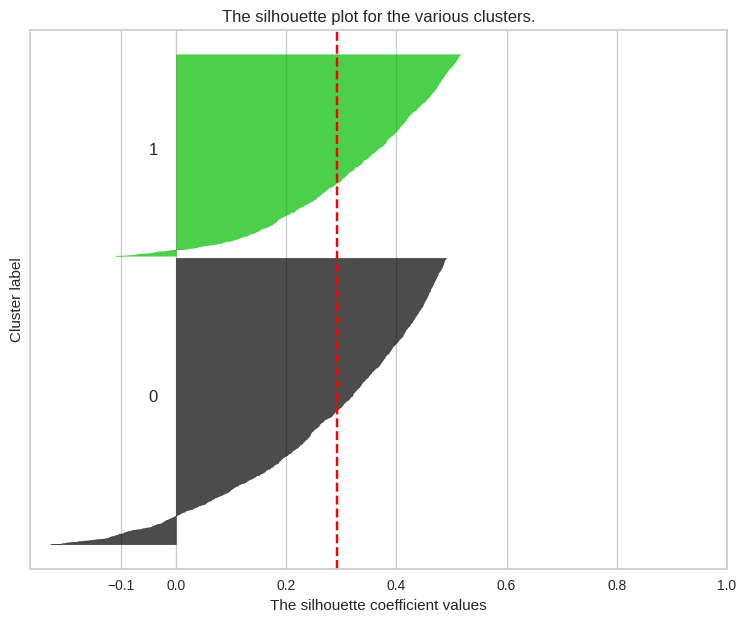

In [ ]:
# Visualisasi Silhouette Plot
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(9, 7)

y_lower = 10
for i in range(2):
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / 2)
    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_title("The silhouette plot for the various clusters.")
ax.set_xlabel("The silhouette coefficient values")
ax.set_ylabel("Cluster label")

# Vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [ ]:
df_agglomerative_labels.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'cluster'],
      dtype='object')

In [ ]:
db_index = davies_bouldin_score(df_agglomerative_labels[['Chloramines', 'Trihalomethanes']], labels)
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 1.2725074371573597


In [ ]:
db_index = davies_bouldin_score(df_agglomerative_labels, labels)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 2.7642959964952993


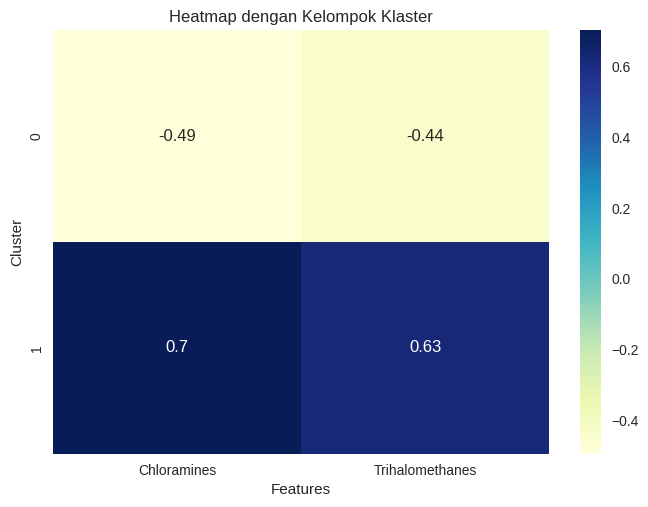

In [ ]:
import seaborn as sns

# Ambil data yang ingin divisualisasikan (misalnya, data yang digunakan untuk klastering)
data = df_agglomerative_labels[['Chloramines', 'Trihalomethanes']]

# Tambahkan kolom klaster ke data
data['Cluster'] = labels  # labels merupakan hasil klastering yang telah Anda lakukan sebelumnya

# Buat heatmap dengan kelompok klaster
sns.heatmap(data.pivot_table(index='Cluster', values=['Chloramines', 'Trihalomethanes'], aggfunc='mean'), cmap='YlGnBu', annot=True)
plt.title('Heatmap dengan Kelompok Klaster')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.show()


In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from scipy.spatial.distance import pdist

# Misalkan X adalah data yang ingin Anda klaster
X = df_agglomerative_labels[['Chloramines', 'Trihalomethanes']].values

# Melakukan hierarchical clustering dan menghitung cophenetic correlation coefficient
Z = linkage(X, method='ward')  # Anda dapat menggunakan metode klastering yang digunakan sebelumnya
c, coph_dists = cophenet(Z, pdist(X))

print(f"Cophenetic Correlation Coefficient: {c}")

Cophenetic Correlation Coefficient: 0.4881584525877338


# Klasifikasi